# Bay Wheels' Trip Data Exploration and Visualization

## Investigation Overview

In this investigation, I wanted to look at the characteristics of bike trips that could be used to predict trip duration, trip time, and customer usage.

## Dataset Overview

This document explores a dataset containing [information](https://www.lyft.com/bikes/bay-wheels/system-data) about individual rides made in [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels)' bike-sharing system covering the greater San Francisco Bay area.  The dataset is data from January 2019 and can be manually downloaded [here](https://s3.amazonaws.com/baywheels-data/index.html).

In [1]:
# import all packages and set plots to be embedded inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201901-fordgobike-tripdata.csv')

In [3]:
# high level overview of data shape and composition
print(df.shape)
print(df.dtypes)
# i prefer looking at it through this instead of print(df.sample(10))
df.sample(10)

(192082, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
951,279,2019-01-31 20:08:17.5980,2019-01-31 20:12:57.5090,74.0,Laguna St at Hayes St,37.776435,-122.426244,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5253,Subscriber,No
131505,911,2019-01-12 14:14:36.8610,2019-01-12 14:29:48.6060,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,177.0,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,5437,Subscriber,No
166460,208,2019-01-07 09:25:52.8030,2019-01-07 09:29:21.3780,58.0,Market St at 10th St,37.776619,-122.417385,78.0,Folsom St at 9th St,37.773717,-122.411647,5052,Subscriber,No
75730,928,2019-01-22 21:13:27.4790,2019-01-22 21:28:55.9760,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,120.0,Mission Dolores Park,37.761420,-122.426435,5039,Subscriber,Yes
118386,400,2019-01-14 22:27:04.9070,2019-01-14 22:33:45.6800,120.0,Mission Dolores Park,37.761420,-122.426435,73.0,Pierce St at Haight St,37.771793,-122.433708,5412,Subscriber,No
142796,123,2019-01-10 16:18:29.8820,2019-01-10 16:20:33.1970,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,5505,Subscriber,No
132998,656,2019-01-12 10:05:39.9280,2019-01-12 10:16:36.2510,76.0,McCoppin St at Valencia St,37.771662,-122.422423,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,281,Subscriber,No
35680,444,2019-01-28 08:49:38.8850,2019-01-28 08:57:03.4340,81.0,Berry St at 4th St,37.775880,-122.393170,104.0,4th St at 16th St,37.767045,-122.390833,5036,Subscriber,No
93899,1102,2019-01-19 15:58:01.5250,2019-01-19 16:16:23.9910,200.0,2nd Ave at E 18th St,37.800214,-122.253810,192.0,37th St at West St,37.826696,-122.271797,5435,Subscriber,No
178859,280,2019-01-03 18:04:12.5580,2019-01-03 18:08:53.0060,36.0,Folsom St at 3rd St,37.783830,-122.398870,27.0,Beale St at Harrison St,37.788059,-122.391865,4929,Subscriber,No


In [4]:
# descriive statistics for numeric variables
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,192082.000000,191834.000000,192082.000000,192082.000000,191834.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,132.841639,37.773438,-122.357820,131.218700,37.773570,-122.357419,4029.012609
std,1672.433843,109.662417,0.091433,0.109472,109.546275,0.091332,0.109058,1571.288901
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3088.000000
50%,528.000000,98.000000,37.780955,-122.398438,95.000000,37.781010,-122.398436,4748.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.796248,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
duration_sec               192082 non-null int64
start_time                 192082 non-null object
end_time                   192082 non-null object
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     192082 non-null float64
start_station_longitude    192082 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       192082 non-null float64
end_station_longitude      192082 non-null float64
bike_id                    192082 non-null int64
user_type                  192082 non-null object
bike_share_for_all_trip    192082 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 20.5+ MB


In [6]:
# investigate what those object types are
type(df['start_time'][0]), type(df['end_time'][0]), type(df['start_station_name'][0])

(str, str, str)

In [7]:
type(df['end_station_name'][0]), type(df['user_type'][0]), type(df['bike_share_for_all_trip'][0])

(str, str, str)

Things to clean
- missing data (null values)
- start_time, end_time are str type and should be datetime objects
- user_type is str and should be categorical type

<a id='clean'></a>
## Cleaning

In [8]:
# before i do any cleaning, make a copy of the dataset
df_clean = df.copy()

In [9]:
# see how many null values there are in each column
df_clean.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           248
start_station_name         248
start_station_latitude       0
start_station_longitude      0
end_station_id             248
end_station_name           248
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

In [10]:
# look at the rows where there are null values
df_clean[df_clean.start_station_id.isnull() == True].sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
59753,671,2019-01-24 17:38:18.3060,2019-01-24 17:49:29.7950,NaN,NaN,37.40,-121.92,NaN,NaN,37.41,-121.94,4241,Subscriber,No
14614,801,2019-01-30 12:31:47.8940,2019-01-30 12:45:09.3740,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4092,Subscriber,No
42712,512,2019-01-26 23:32:25.8440,2019-01-26 23:40:58.4440,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4098,Subscriber,No
46658,3668,2019-01-26 11:33:26.4420,2019-01-26 12:34:34.5540,NaN,NaN,37.41,-121.96,NaN,NaN,37.42,-121.96,4232,Customer,No
148903,358,2019-01-09 17:55:39.4650,2019-01-09 18:01:37.8660,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.94,4095,Subscriber,No


In [11]:
# after looking at the nulls, i decided i'll just remove them
# remove the rows where start_station_id is null
df_clean = df_clean[df_clean.start_station_id.isnull() == False]
# check to see if there are still columns with nulls
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# check for duplicate rows
df_clean.duplicated().sum()

0

In [13]:
# convert start_time and end_time to datetime objects
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

# convert user_type to categorical type
df_clean.user_type = df_clean.user_type.astype('category')

In [14]:
#check if it converted properly
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191834 entries, 0 to 192081
Data columns (total 14 columns):
duration_sec               191834 non-null int64
start_time                 191834 non-null datetime64[ns]
end_time                   191834 non-null datetime64[ns]
start_station_id           191834 non-null float64
start_station_name         191834 non-null object
start_station_latitude     191834 non-null float64
start_station_longitude    191834 non-null float64
end_station_id             191834 non-null float64
end_station_name           191834 non-null object
end_station_latitude       191834 non-null float64
end_station_longitude      191834 non-null float64
bike_id                    191834 non-null int64
user_type                  191834 non-null category
bike_share_for_all_trip    191834 non-null object
dtypes: category(1), datetime64[ns](2), float64(6), int64(2), object(3)
memory usage: 20.7+ MB


### What is the structure of your dataset?

There are 191,834 individual trip records with 14 variables.  The variables can be broken into 3 categories.

Trip duration: duration_sec, start_time, end_time

Station info: start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude

User info: bike_id, user_type, bike_share_for_all_trip  

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in trip duration, which days are the busiest, and whether membership affects trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

duration_sec will be useful in understanding how long a trip would take.  start_time would also be useful in determining which days are the busiest.  user_type will be useful in determining whether being a subscriber or casual user affects the trip duration.

<a id='uni'></a>
## Univariate Exploration

First I'll look at the distribution of duration_sec.

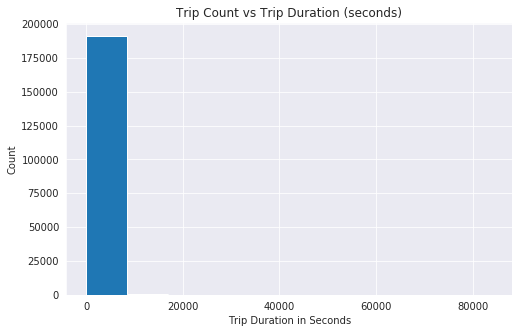

In [15]:
# set figure size 
plt.figure(figsize = (8, 5))

# set axis labels and title
plt.xlabel('Trip Duration in Seconds')
plt.ylabel('Count')
plt.title('Trip Count vs Trip Duration (seconds)')

# plot the data
plt.hist(data = df_clean, x = 'duration_sec');

For the x axis to span to 80000 seconds, there must be some outliers that aren't visible.

In [16]:
# for the sake of easier understanding, i will create a duration_min column
df_clean['duration_min'] = df_clean.duration_sec / 60

In [17]:
# look at where most of the data is
df_clean.duration_min.describe(percentiles=[.99])

count    191834.000000
mean         12.504311
std          27.835413
min           1.016667
50%           8.800000
99%          66.561167
max        1400.033333
Name: duration_min, dtype: float64

## Trip Count vs Trip Duration (min)


Trip durations in the dataset take on a very large range of values, from about 1 minute at the lowest, to about 23.3 hours at the highest.  Zoomed in on 99% of the trips, the distribution of trip duration is skewed right.  We can see that 99% of the trips were less than one hour in duration.  Most the the trips fell between the 5 and 10 minute range.

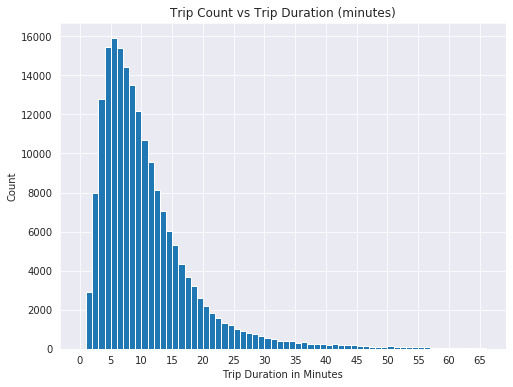

In [18]:
# set the size of the plot
plt.figure(figsize = (8, 6))

# set the bin size and x tick size
bins = np.arange(0, 67, 1)
ticks = np.arange(0, 67 , 5)

# set the x ticks
plt.xticks(ticks, ticks)
# set the axis labels and title
plt.xlabel('Trip Duration in Minutes')
plt.ylabel('Count')
plt.title('Trip Count vs Trip Duration (minutes)')

# plot the data
plt.hist(data = df_clean, x = 'duration_min', bins = bins);

In [19]:
# using the start_time, i can extract days and hours
df_clean['start_hour'] = df_clean.start_time.dt.hour
df_clean['start_day'] = df_clean.start_time.dt.strftime('%A')

In [20]:
# i'm just checking to see if it worked
df_clean.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,duration_min,start_hour,start_day
144968,811,2019-01-10 09:14:12.283,2019-01-10 09:27:43.309,61.0,Howard St at 8th St,37.776513,-122.411306,116.0,Mississippi St at 17th St,37.764802,-122.394771,5068,Subscriber,No,13.516667,9,Thursday


In [21]:
# i'm going to convert start_dayofweek to an ordered categorical datatype
day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
categorical_day = pd.api.types.CategoricalDtype(ordered = True, categories = day)
df_clean.start_day = df_clean.start_day.astype(categorical_day)

In [22]:
# checking if it worked
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
bike_share_for_all_trip            object
duration_min                      float64
start_hour                          int64
start_day                        category
dtype: object

Now I want to look at the distribution of trip on days of a week.

## Trip Count vs Day

We can see that Thursday has the most trips.  We can also see that more trips happen during the weekdays.  There are less trips happening during the weekend.  Maybe the hour trips happen is causing this?

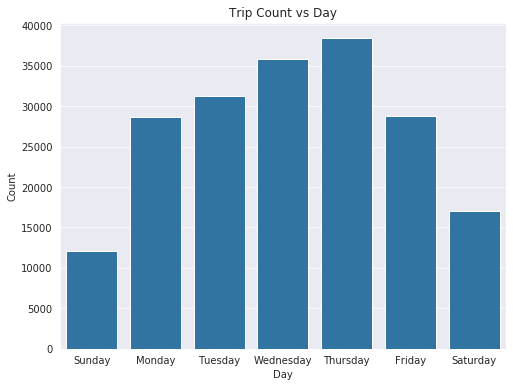

In [23]:
# set the size of the plot
plt.figure(figsize = (8, 6))

# set colors in the plot
base_color = sns.color_palette()[0]

# this is the plot
ax = sns.countplot(data = df_clean, x = 'start_day', color = base_color)

# set axis labels and title
ax.set(xlabel = 'Day', ylabel = 'Count', title = 'Trip Count vs Day')

# show the plot
plt.show()

## Trip Count vs Hour

We can see two peaks in the data.  The first peak is at 8 AM, and the second peak is at 5 PM.  It is possible that those trips are users commuting to work.  We can't say that for certain as we would need more personalized data, and we don't have that type of data since our dataset was anonymized to preserve privacy.  Though if it is really because of work commute, it would be in line with the *Trip Count vs Day* plot earlier.  Monday through Friday had more trips and those are the normal work days.

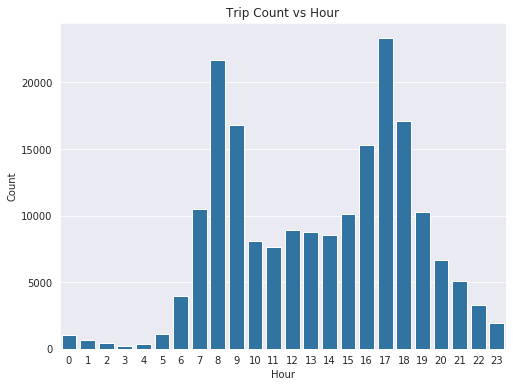

In [24]:
# set the figure size
plt.figure(figsize = (8, 6))

# this is the plot
ax = sns.countplot(data = df_clean, x = 'start_hour', color = base_color)

# set axis labels and title
ax.set(xlabel = 'Hour', ylabel = 'Count', title = 'Trip Count vs Hour')

# show the plot
plt.show()

## Trip Count vs User Type

There are two types of user.  Customers are users who are not members of the bike sharing service, while subscribers are.  We can see that there are more subscribers than there are customers.

Subscriber    168561
Customer       23273
Name: user_type, dtype: int64


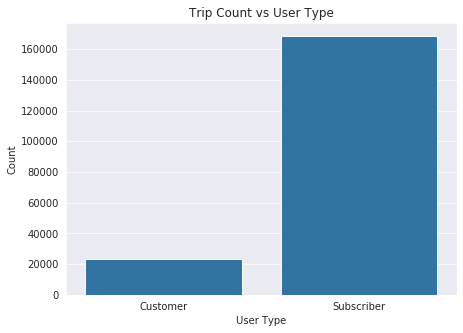

In [25]:
# i'm just looking at the values for the two bars
print(df_clean['user_type'].value_counts())

# set the figure size
plt.figure(figsize = (7,5))

# this is the plot
ax = sns.countplot(data = df_clean, x = 'user_type', color = base_color)

# set labels and title
ax.set(xlabel = 'User Type', ylabel = 'Count', title = 'Trip Count vs User Type')

# show the plot
plt.show()

No     175769
Yes     16065
Name: bike_share_for_all_trip, dtype: int64


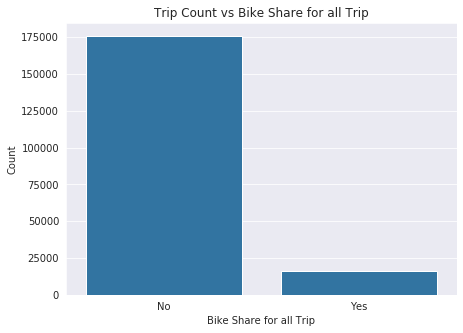

In [26]:
# looking at the value for the two bars
print(df_clean['bike_share_for_all_trip'].value_counts())

# set the figure size
plt.figure(figsize = (7,5))

# plot data
ax = sns.countplot(data = df_clean, x = 'bike_share_for_all_trip', color = base_color)

# set labels and title
ax.set(xlabel = 'Bike Share for all Trip', ylabel = 'Count', title = 'Trip Count vs Bike Share for all Trip')

plt.show()

Most users do not use the bike share service for their entire trip.

### Discuss the distribution(s) of your variable(s) of interest.  Were there any unusual points?  Did you need to perform any tranformations?

99% of user trips were under 66.56 minutes.  Most of the trips were quick and lasted between 5 to 10 minutes.  The maximum trip duration lasted for 1400 minutes which is about 23.3 hours (~23 hours 20 minutes).  That's almost an entire day!  The trip count is higher Mondays through Fridays.  Thursdays have the most trip count.  During the day, the trip count peaks at 8 AM and also peaks at 5 PM.

Looking at user types, there are more subscribers than there are customers, and most users do not use the bike share service for their entire trip.

### Of the features you investigated, were there any unusual distributions?  Did you perform any operations on the data to tidy, adjust, or change the form of the data?  If so, why did you do this?

The initial plotting of trip duration distribution was unusual.  After looking at .describe() with a 99th percentile, I was able to see where most of the data was.  Using the 99th percentile as the ceiling, I plotted another distribution which was a lot clearer than the first.

<a id='bi'></a>
## Bivariate Exploration

How does the trip count vary by day and hour?

## Trip Count by Day and Hour

After looking at *Trip Count vs Day* and *Trip Count vs Hour* plots, it made me think about plotting the number of trips on each day and hour.  The result is this plot.  Please first notice that the y-axis for each histogram is not the same scale.  This plot shows histograms for each day.  Each day's trip count is distributed over the hour of the day.  For each day, we can see which time periods have higher trip counts.

On Sundays and Saturdays, we can see that the trip count is highest between 2-3 PM.  Mondays through Fridays, you can see two peaks.  The first peak is at 8 AM and the second peak is at 5 PM.  The two peak times match the two peak times in *Trip Count vs Hour*.  If it is not obvious, Mondays - Fridays have higher trip counts than Saturdays and Sundays.  The earlier *Trip Count vs Day* plot would support that.

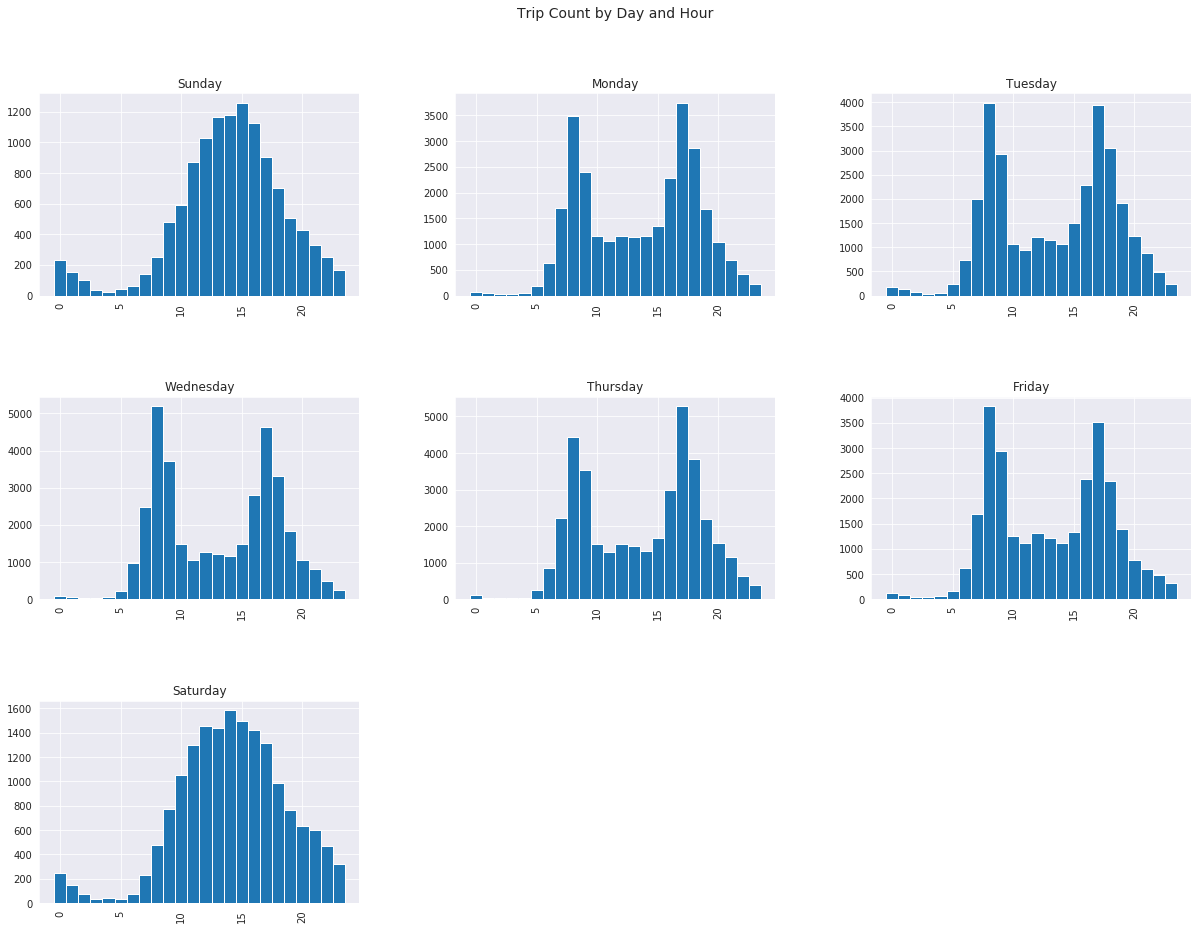

In [27]:
# plot figure size
plt.rcParams["figure.figsize"] = [20,15]
# bins to make the tick numbers centered
bins24 = np.arange(25) - 0.5
# the plot
df_clean.hist(column = 'start_hour', by = 'start_day', bins = bins24)
plt.suptitle('Trip Count by Day and Hour', fontsize = 14);

How does the trip count vary by user type and hour of the day?

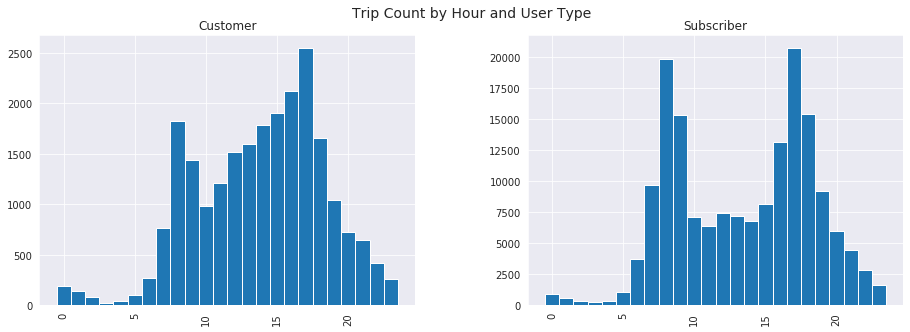

In [28]:
# figure size
plt.rcParams["figure.figsize"] = [15,5]
# the plot
df_clean.hist(column = 'start_hour', by = 'user_type', bins = bins24)
plt.suptitle('Trip Count by Hour and User Type', fontsize = 14);

## Trip Count by Hour and User Type

Customers' trip count first peaks at 8 AM and peaks again at 5 PM.  Subscribers' trip count first peaks at 8 AM and peaks again at 5 PM.  The difference between the two user types is the scale of the plots.  The Customer and Subscriber hours may peak at the same time, but you can see that there is a huge difference in the distribution of trip counts.

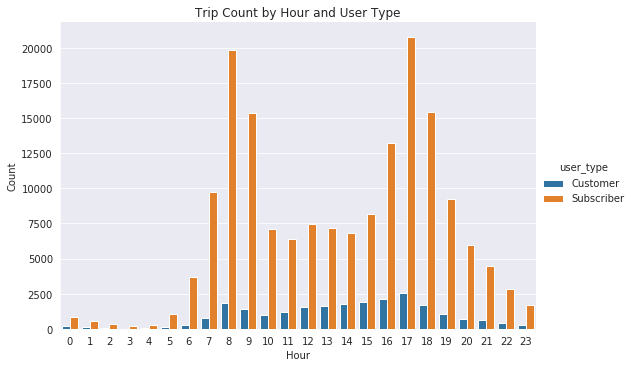

In [29]:
# the plot
sns.catplot(data = df_clean, x = 'start_hour', kind = 'count', hue = 'user_type', height = 5, aspect = 1.5)
# labels
plt.title('Trip Count by Hour and User Type')
plt.xlabel('Hour')
plt.ylabel('Count');

How does the trip count vary by day of the week and user type?

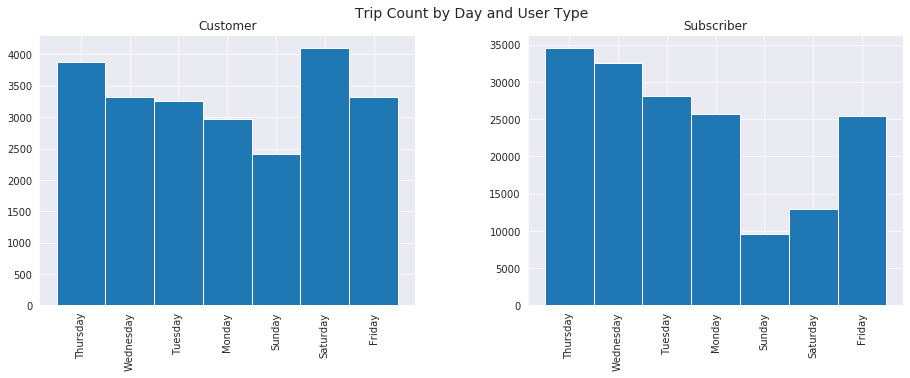

In [30]:
# figure size
plt.rcParams["figure.figsize"] = [15,5]
# the plot
df_clean.hist(column = 'start_day', by = 'user_type', bins = np.arange(8)-0.5)
plt.suptitle('Trip Count by Day and User Type', fontsize = 14);

## Trip Count by Day and User Type

The plot shows us the trip count broken down by day of the week and user type.  For subscribers their highest trip counts are on Thursdays, while the customers highest trip counts are on Saturdays.

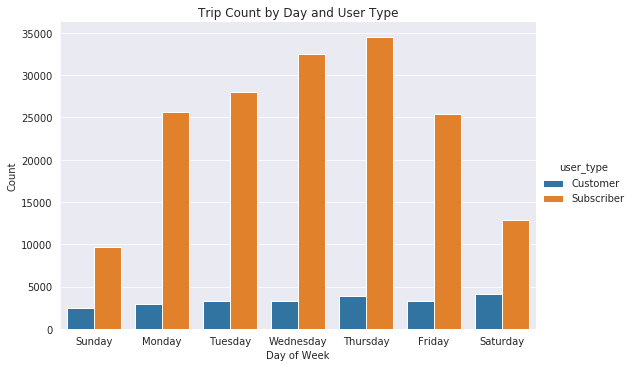

In [31]:
# the plot
sns.catplot(data = df_clean, x = 'start_day', kind = 'count', hue = 'user_type', height = 5, aspect = 1.5)
# labels
plt.title('Trip Count by Day and User Type')
plt.xlabel('Day of Week')
plt.ylabel('Count');

How does the trip duration distribution vary between customers and subscribers?

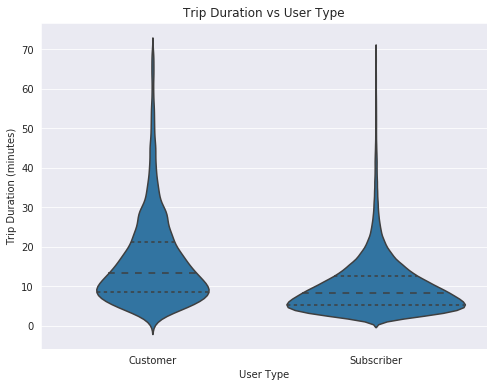

In [32]:
# remember that most of the data has duration_min less that 66.56 minutes
data = df_clean[df_clean['duration_min'] < 70]
# figure size
plt.rcParams["figure.figsize"] = [8,6]
# the plot
sns.violinplot(data = data, x = 'user_type', y = 'duration_min', color = base_color, inner = 'quartile')
# labels
plt.xlabel('User Type')
plt.ylabel('Trip Duration (minutes)')
plt.title('Trip Duration vs User Type');

Subscribers generally take shorter rides than customers.  For subscribers, the widest part of the graph is around 5 minutes, while for customers, the widest part of the graph is around 9 minutes.

How does the trip duration vary between the days of the week?

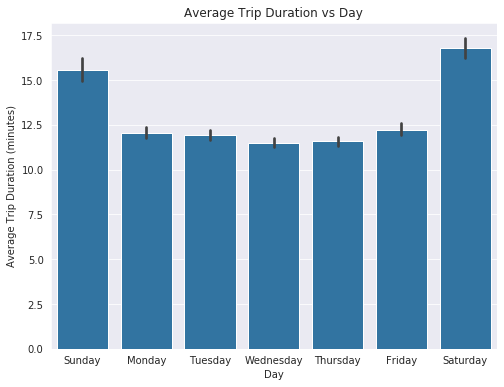

In [33]:
sns.barplot(data = df_clean, x = 'start_day', y = 'duration_min', color = base_color)
plt.xlabel('Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration vs Day');

The trip durations are shorter Monday through Friday.  On the weekends, trips are longer.  Weekdays the trips last between 10-12.5 minutes, while on the weekends the trips last betwen 15-17.5 minutes.

### Talk about some of the relationships you observed in this part of the investigation.  How did the feature(s) of interest vary with other features in the dataset?

There are more users taking trips during weekdays than they are on weekends.  On weekends the trip count peaks between 2-3 PM.  On weekdays, the trip count peaks at 8 AM and 5 PM.  Breaking this information down to vary between user types, I found that both customers and subscribers trip counts peak at 8 AM and 5 PM.  The difference is that there are more subscribers than there are customers.

Lookin at the relationship between daily trip count and user type, it was shown that subscribers have high trip counts on Thursdays while customers have high trip counts on Saturdays.  Looking at the relationship between user type and trip duration, subscribers generally have shorter rides than customers.  Looking at the relationship between trip duration and day of the week, trip durations are shorter on weekdays than weekends.  On weekdays the trips last between 10-12.5 minutes, while one weekends the trips last betwee 15-17.5 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It is interesting to see that the subscribers' trip count is the highest on Thursday.

<a id='multi'></a>
## Multivariate Exploration

How does the trip duration vary in days between customers and subscribers?

## Average Trip Duration by Day and User Type

Subscribers have much shorter trips than customers on each day.  Both user types have an increased trip duration on the weekends compared to the weekdays.  Subscribers have a consistent average trip duration during the weekdays.

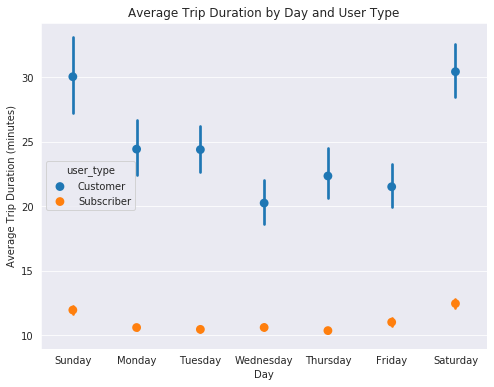

In [34]:
# the plot
sns.pointplot(data = df_clean, x = 'start_day', y = 'duration_min', hue = 'user_type', linestyles = '')
# labels
plt.xlabel('Day')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day and User Type');

How does the trip count vary by hour and day for the user types?

## Trip Duration (min) by Day and Hour

The heatmaps show that customers use the bikeshare service heavily on the weekends.  Customers use the service the most on Saturdays at 2 PM.  They also use the service a lot on Thursday at 5 PM.  Subscribers use the service mostly during the weekdays at 8 AM and 5 PM.

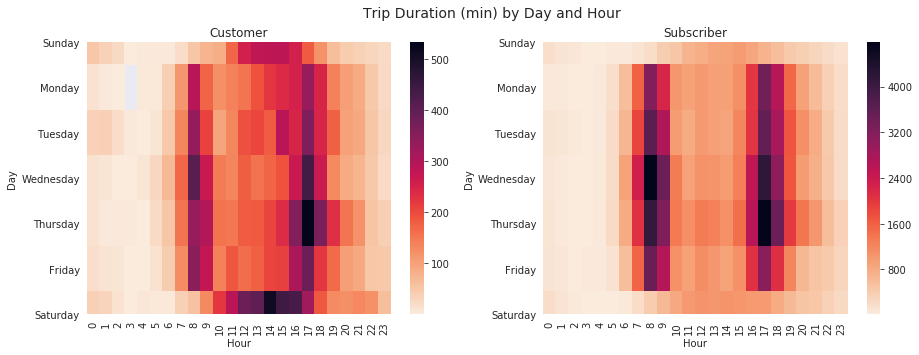

In [35]:
# figure size
plt.figure(figsize = (15,5))
# plot location
plt.subplot(1,2,1)
# separating customers and subscibers to different dataframes
cus = df_clean.query('user_type == "Customer"')
cus_counts = cus.groupby(['start_day', 'start_hour']).size()
cus_counts = cus_counts.reset_index(name = 'count')
cus_counts = cus_counts.pivot(index = 'start_day', columns = 'start_hour', values = 'count')
# the plot
sns.heatmap(cus_counts, cmap = 'rocket_r')
# labels
plt.title('Customer')
plt.xlabel('Hour')
plt.ylabel('Day');

plt.subplot(1,2,2)
sub = df_clean.query('user_type == "Subscriber"')
sub_counts = sub.groupby(['start_day', 'start_hour']).size()
sub_counts = sub_counts.reset_index(name = 'count')
sub_counts = sub_counts.pivot(index = 'start_day', columns = 'start_hour', values = 'count')
sns.heatmap(sub_counts, cmap = 'rocket_r')
plt.title('Subscriber')
plt.xlabel('Hour')
plt.ylabel('Day')
plt.suptitle('Trip Duration (min) by Day and Hour', fontsize = 14);

### Talk about some of the relationships you observed in this part of the investigation.  Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part of the investigation, we found that subscribers have shorter trips than customers on a daily basis.  Both users have an increased trip duration on the weekends.  We also found that customers use the bikeshare service the most on Saturdays at 2 PM.  Subscribers use the service the most during weekdays around 8 AM and 5 PM.

The multivariate exploration strengthened some of the patterns found earlier in the univariate and bivariate explorations.  There are more subscribers than customers.  Subscribers use the bikes mostly during the weekdays and generally have shorter trips.  Customers use the bikes mostly during the weekends and have longer trips than subscribers.

### Were there any interesting or surprising interactions between features?

There were no surprising interactions between features.